## Important Dependencies for the project
 Run the below code shell to install all the required dependencies for the project

In [1]:
'''
!pip install pandas numpy matplotlib seaborn scikit-learn imbalanced-learn xgboost lightgbm shap
'''

'\n!pip install pandas numpy matplotlib seaborn scikit-learn imbalanced-learn xgboost lightgbm shap\n'

In [41]:
# Core libraries and visualization libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# For preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# For Handling Class Imbalance
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE, SMOTENC

# For Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# For Model evaluation and explainability
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, f1_score, precision_score,fbeta_score, recall_score, accuracy_score, make_scorer
import shap

# 1. Exploratory Data Analysis (EDA)


In [22]:
# Importing and displaying its head
train_data = "Datasets_final/train_dataset_final1.csv"
df = pd.read_csv(train_data)
pd.set_option('display.max_columns', None)
print("The 1st 5 rows of the dataset: ")
print(df.head())

# Description of continous features
exclude = ['PAY_TO_BILL_ratio','Customer_ID','marriage','sex','education','next_month_default', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']
include = df.columns.difference(exclude)
print("\n \n \n Description of the various columns of dataset:")
df[include].describe()

The 1st 5 rows of the dataset: 
   Customer_ID  marriage  sex  education  LIMIT_BAL   age  pay_0  pay_2  \
0         5017         2    0          2      60000  25.0      2      2   
1         5018         2    1          1     290000  24.0      0      0   
2         5019         1    0          2     180000  63.0      0      0   
3         5020         1    1          2     210000  43.0      0      0   
4         5021         2    0          1     280000  32.0     -2     -2   

   pay_3  pay_4  pay_5  pay_6  Bill_amt1  Bill_amt2  Bill_amt3  Bill_amt4  \
0      2      0      0      0   60323.86   60728.22   56472.74   28602.01   
1     -2     -2     -1      0   11157.67       0.00       0.88       0.65   
2      0      0      0      0   47930.96   48921.91   50034.26   50748.90   
3      0      0      0      0   91152.44   92916.01   90652.30   85295.56   
4     -2     -2     -2     -2   19666.40     999.04    3186.48   44932.48   

   Bill_amt5  Bill_amt6  pay_amt1  pay_amt2  pay_amt3 

,AVG_Bill_amt,Bill_amt1,Bill_amt2,Bill_amt3,Bill_amt4,Bill_amt5,Bill_amt6,LIMIT_BAL,age,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6
count,25247.000000,25247.000000,25247.000000,2.524700e+04,25247.000000,25247.000000,25247.000000,25247.000000,25121.000000,25247.000000,2.524700e+04,25247.000000,25247.000000,25247.000000,25247.000000
mean,44859.647485,51170.887938,49092.268745,4.695839e+04,43134.911103,40218.976171,38806.221029,168342.060443,35.438199,5718.624966,6.047352e+03,5288.910651,4865.960834,4906.766828,5270.499287
std,62819.226119,73250.806650,70695.367650,6.895687e+04,63846.205694,60389.690737,59182.792531,129892.784807,9.174998,16806.842125,2.400962e+04,17851.879609,15979.116544,15860.726852,17960.816915
min,-56043.170000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,10000.000000,21.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,4858.670000,3601.340000,3017.155000,2.753275e+03,2319.615000,1770.625000,1241.710000,50000.000000,28.000000,999.985000,9.219100e+02,399.990000,300.150000,262.365000,130.070000
50%,21102.830000,22436.740000,21245.880000,2.008554e+04,19027.840000,18069.760000,17102.580000,140000.000000,34.000000,2145.020000,2.026830e+03,1844.300000,1500.100000,1513.790000,1500.040000
75%,57136.580000,67373.410000,64151.875000,6.022971e+04,54391.160000,50289.525000,49245.195000,240000.000000,41.000000,5031.150000,5.000190e+03,4600.640000,4014.990000,4099.890000,4018.780000
max,877313.830000,964511.160000,983931.050000,1.664089e+06,891585.580000,927172.770000,961663.620000,1000000.000000,79.000000,873551.980000,1.684259e+06,896040.150000,621000.080000,426529.180000,528666.150000


In [6]:
# Check for NaN values
print(df.isna().sum())
print("\n \n \n \n")

# Check for any invalid values in any categorical Data
categories = ['marriage','sex','education','next_month_default','pay_0' ,'pay_6' ,'pay_2' ,'pay_3' ,'pay_4' ,'pay_5']
for cat in categories:
    print(df[cat].value_counts())
    print("\n")

Customer_ID             0
marriage                0
sex                     0
education               0
LIMIT_BAL               0
age                   126
pay_0                   0
pay_2                   0
pay_3                   0
pay_4                   0
pay_5                   0
pay_6                   0
Bill_amt1               0
Bill_amt2               0
Bill_amt3               0
Bill_amt4               0
Bill_amt5               0
Bill_amt6               0
pay_amt1                0
pay_amt2                0
pay_amt3                0
pay_amt4                0
pay_amt5                0
pay_amt6                0
AVG_Bill_amt            0
PAY_TO_BILL_ratio       0
next_month_default      0
dtype: int64

 
 
 

marriage
2    13441
1    11480
3      273
0       53
Name: count, dtype: int64


sex
1    15252
0     9995
Name: count, dtype: int64


education
2    11717
1     8988
3     4115
5      253
4      116
6       44
0       14
Name: count, dtype: int64


next_month_default
0    204

### Inference from the above output

As we have 126 NaN values in `age` which we'll replace by median of age 

Also we have extra categories which are not defined in `education` (i.e 0,5,6) 
and in `marriage` (i.e 0) which we'll categorize in others category for both the categories (i.e replace them by 4 and 3 respectively).

In [8]:
df['age'] = df['age'].fillna(df['age'].median())
print("NaN values in age: ")
print(df['age'].isna().sum())

df['education'] = df['education'].replace({0: 4, 5: 4, 6: 4})
df['marriage'] = df['marriage'].replace({0: 3})
print(df['education'].value_counts())
print(df['marriage'].value_counts())

NaN values in age: 
0
education
2    11717
1     8988
3     4115
4      427
Name: count, dtype: int64
marriage
2    13441
1    11480
3      326
Name: count, dtype: int64


In [9]:
corr = df.corr()
target_corr = corr['next_month_default'].sort_values(ascending=False)
print(target_corr)

next_month_default    1.000000
pay_0                 0.312943
pay_2                 0.252125
pay_3                 0.226015
pay_4                 0.207488
pay_5                 0.196329
pay_6                 0.180387
education             0.032346
age                   0.017703
Customer_ID          -0.001893
PAY_TO_BILL_ratio    -0.005528
Bill_amt6            -0.005725
Bill_amt5            -0.008983
Bill_amt4            -0.012032
AVG_Bill_amt         -0.014694
Bill_amt2            -0.016079
Bill_amt3            -0.016706
Bill_amt1            -0.021729
marriage             -0.029242
sex                  -0.037537
pay_amt5             -0.046960
pay_amt6             -0.047116
pay_amt3             -0.050925
pay_amt2             -0.053623
pay_amt4             -0.053624
pay_amt1             -0.068882
LIMIT_BAL            -0.146010
Name: next_month_default, dtype: float64


The below are some plots for gaining useful insights from the data

C:\Users\heman\AppData\Local\Temp\ipykernel_14536\1876017008.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['next_month_default'], data=df, palette='Set2', width = 0.25)


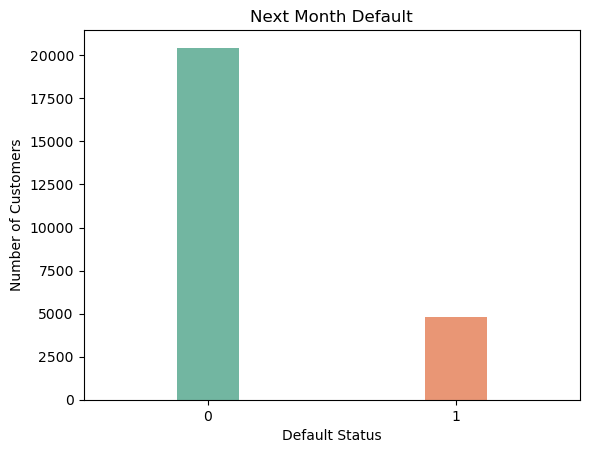

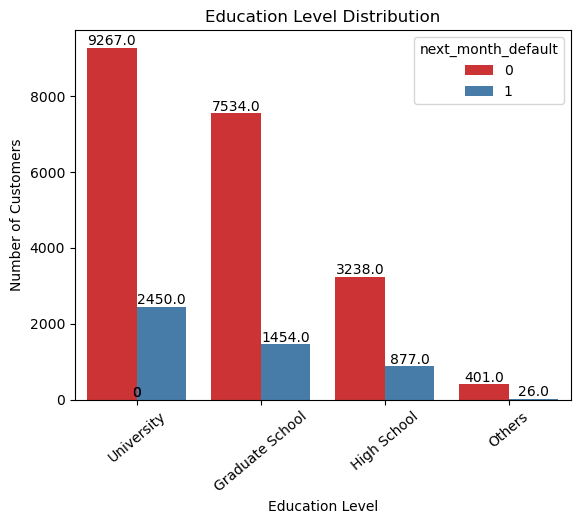

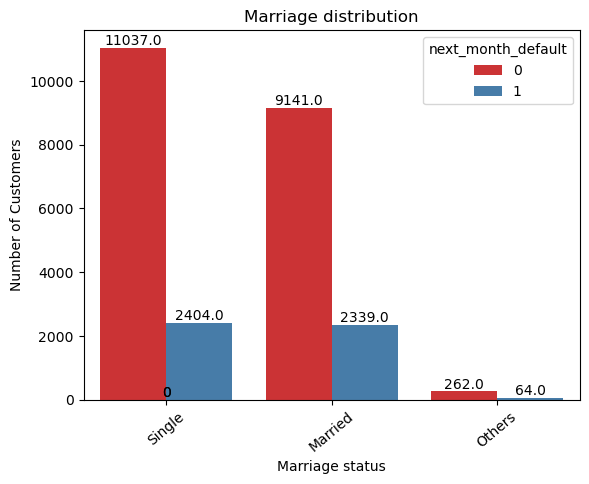

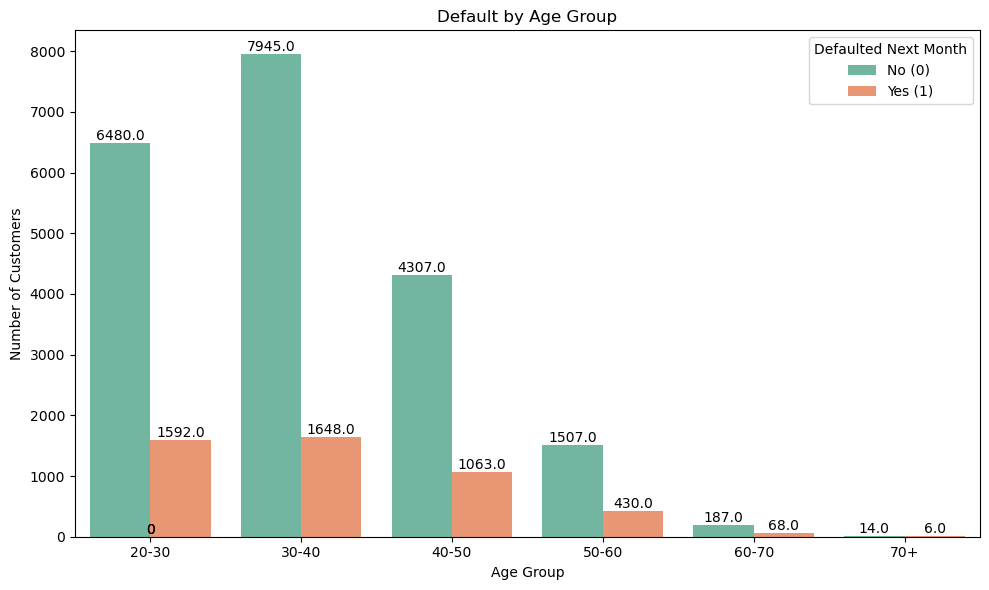

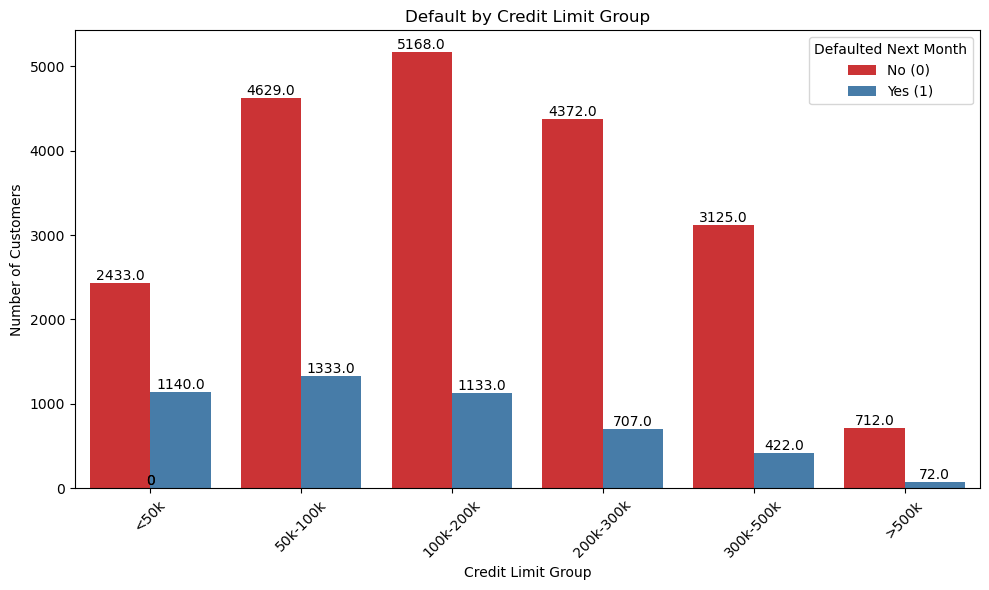

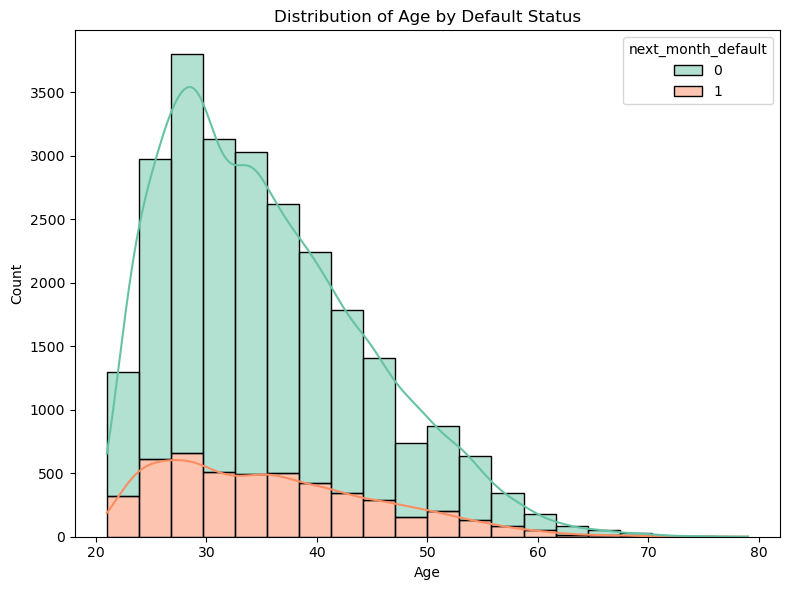

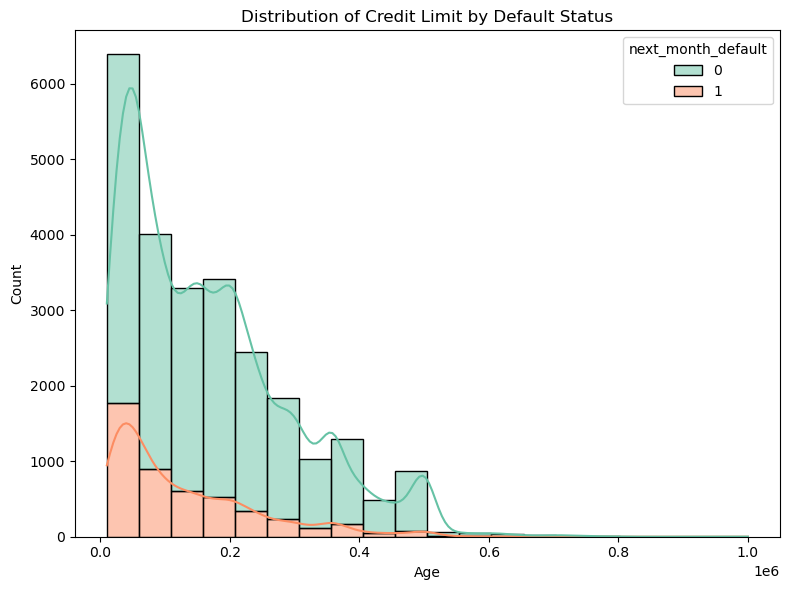

In [11]:
#Count plot for target variable
sns.countplot(x=df['next_month_default'], data=df, palette='Set2', width = 0.25)
plt.title('Next Month Default')
plt.xlabel('Default Status')
plt.ylabel('Number of Customers')
plt.show()



#Education level distribution
edu_map = {
    1: 'Graduate School',
    2: 'University',
    3: 'High School',
    4: 'Others',
}
df['EDUCATION_LABEL'] = df['education'].map(edu_map)

edu_plot = sns.countplot(x='EDUCATION_LABEL', hue='next_month_default', data=df, palette='Set1')
for p in edu_plot.patches:
    height = p.get_height()
    edu_plot.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black')

plt.title('Education Level Distribution')
plt.xlabel('Education Level')
plt.ylabel('Number of Customers')
plt.xticks(rotation=40)
plt.show()



#Marriage Default plot
marriage_map = {
    1: 'Married',
    2: 'Single',
    3: 'Others',
}
df['Marriage_label'] = df['marriage'].map(marriage_map)

marriage_plot = sns.countplot(x='Marriage_label', hue='next_month_default', data=df, palette='Set1')
for q in marriage_plot.patches:
    height = q.get_height()
    marriage_plot.annotate(f'{height}', 
                (q.get_x() + q.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black')

plt.title('Marriage distribution')
plt.xlabel('Marriage status')
plt.ylabel('Number of Customers')
plt.xticks(rotation=40)
plt.show()



#Default by age group
bins = [20, 30, 40, 50, 60, 70, 100]
labels = ['20-30', '30-40', '40-50', '50-60', '60-70', '70+']

df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(10, 6))
age_plot = sns.countplot(x='age_group', hue='next_month_default', data=df, palette='Set2')
for p in age_plot.patches:
    height = p.get_height()
    age_plot.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black')

plt.title('Default by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.legend(title='Defaulted Next Month', labels=['No (0)', 'Yes (1)'])
plt.tight_layout()
plt.show()



#Default by credit limit
bins_1 = [0, 50000, 100000, 200000, 300000, 500000, 1000000]
labels_1 = ['<50k', '50k-100k', '100k-200k', '200k-300k', '300k-500k', '>500k']

df['limit_group'] = pd.cut(df['LIMIT_BAL'], bins=bins_1, labels=labels_1, right=False)

plt.figure(figsize=(10, 6))
credit_lim_plot = sns.countplot(x='limit_group', hue='next_month_default', data=df, palette='Set1')

for p in credit_lim_plot.patches:
    height = p.get_height()
    credit_lim_plot.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black')

plt.title('Default by Credit Limit Group')
plt.xlabel('Credit Limit Group')
plt.ylabel('Number of Customers')
plt.legend(title='Defaulted Next Month', labels=['No (0)', 'Yes (1)'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#Default status by age
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='age', hue='next_month_default', bins=20, kde=True, palette='Set2', multiple='stack')
plt.title('Distribution of Age by Default Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
plt.show()



#Default status by credit limit
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='LIMIT_BAL', hue='next_month_default', bins=20, kde=True, palette='Set2', multiple='stack')
plt.title('Distribution of Credit Limit by Default Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [12]:
'''This code shell is for dropping all the category variables and 
    Customer_ID that we've generated above for visualization'''

drop = ['EDUCATION_LABEL', 'limit_group', 'age_group', 'Marriage_label' , 'Customer_ID']
df.drop(drop, axis=1, inplace=True)

### Average bill amount Plot

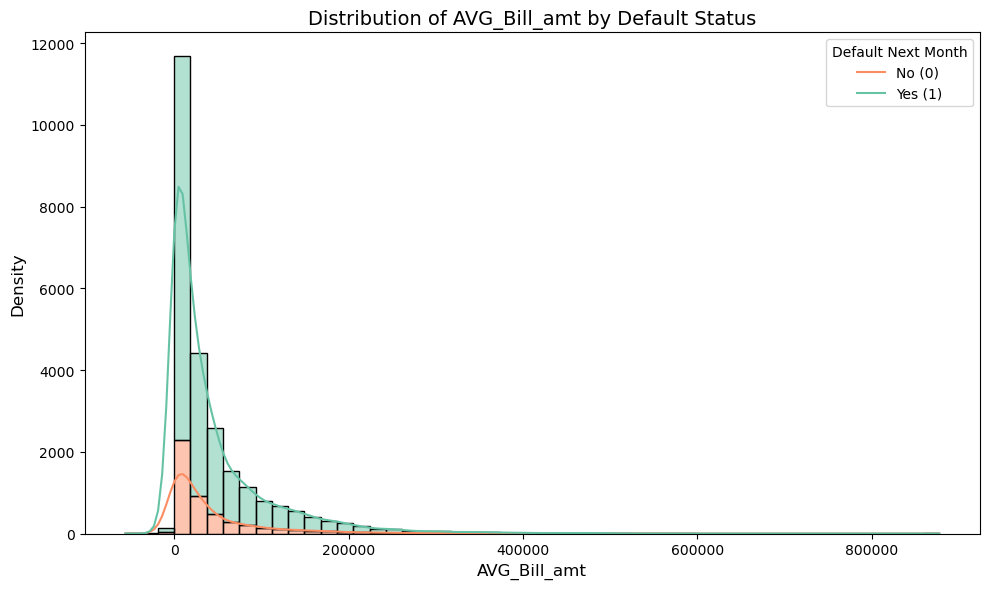

In [13]:
#Average bill amount distribution
df['next_month_default'] = df['next_month_default'].astype(str)

plt.figure(figsize=(10, 6))
sns.histplot(data=df,x='AVG_Bill_amt',hue='next_month_default', bins=50, kde=True, palette='Set2', multiple='stack')

# Titles and labels
plt.title('Distribution of AVG_Bill_amt by Default Status', fontsize=14)
plt.xlabel('AVG_Bill_amt', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title='Default Next Month', labels=['No (0)', 'Yes (1)'])
plt.tight_layout()
plt.show()

### Pay to bill ratio plot

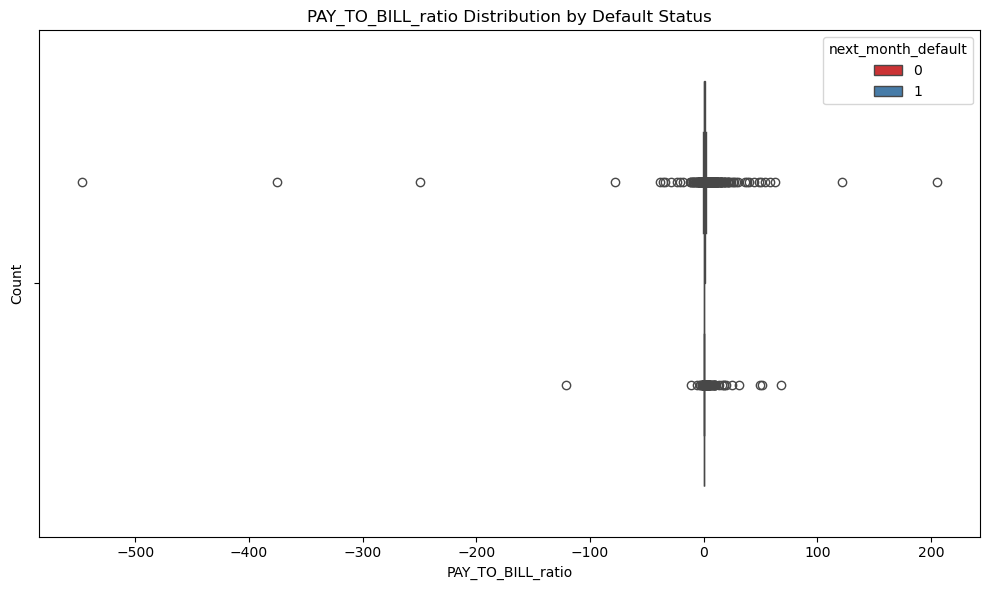

Number of outliers: 829


In [14]:
#Pay to bill ratio plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='PAY_TO_BILL_ratio', hue='next_month_default', palette='Set1')

plt.title('PAY_TO_BILL_ratio Distribution by Default Status')
plt.xlabel('PAY_TO_BILL_ratio')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

#For number of outliers in 'PAY_TO_BILL_ratio'
Q1 = df['PAY_TO_BILL_ratio'].quantile(0.25)
Q3 = df['PAY_TO_BILL_ratio'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['PAY_TO_BILL_ratio'] < lower_bound) | (df['PAY_TO_BILL_ratio'] > upper_bound)]
print(f"Number of outliers: {len(outliers)}")

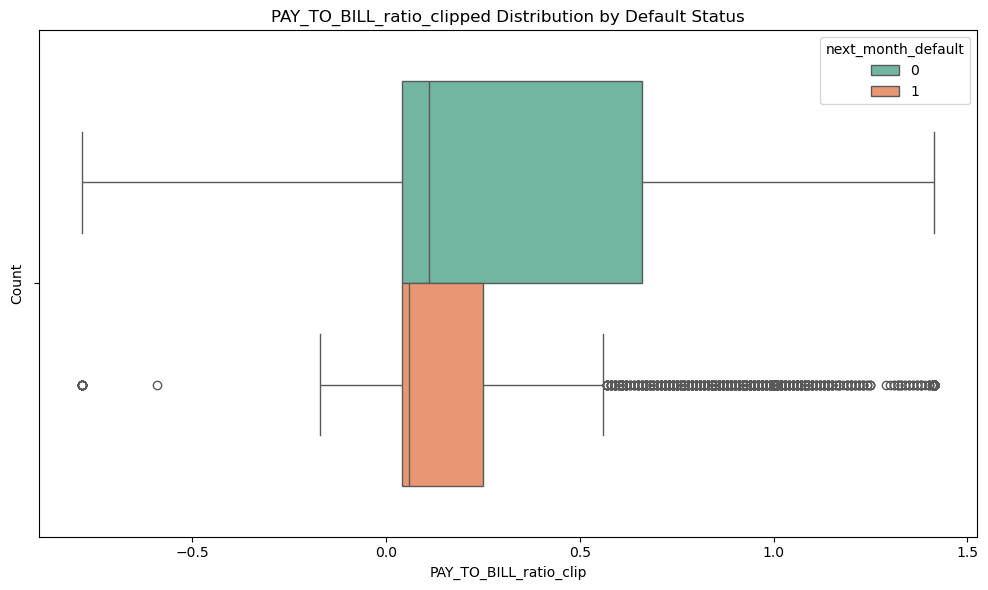

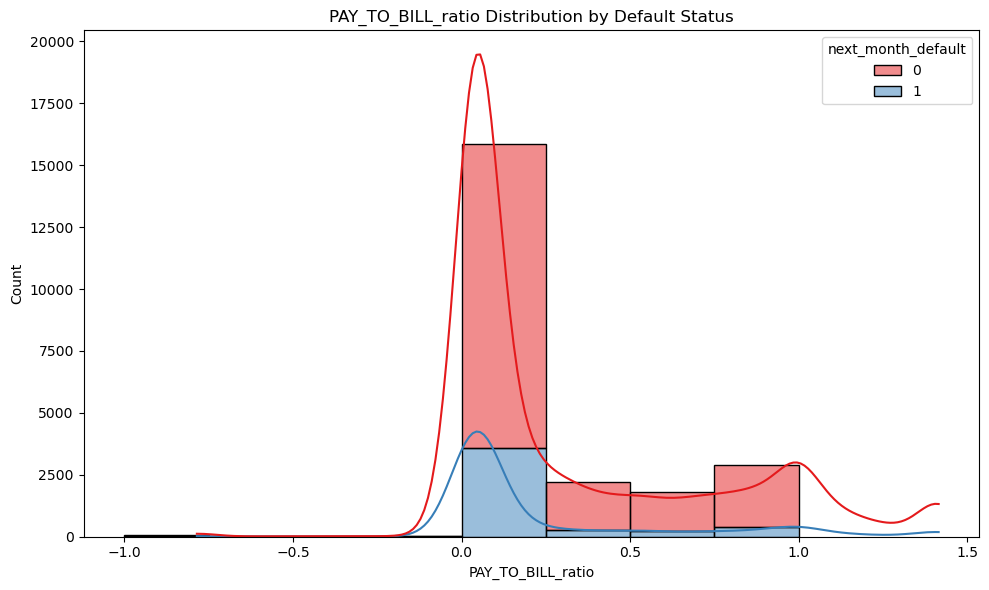

In [24]:
#Addresing outliers by clipping
df['PAY_TO_BILL_ratio_clip'] = df['PAY_TO_BILL_ratio'].clip(lower=lower_bound, upper=upper_bound)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='PAY_TO_BILL_ratio_clip', hue='next_month_default', palette='Set2')

plt.title('PAY_TO_BILL_ratio_clipped Distribution by Default Status')
plt.xlabel('PAY_TO_BILL_ratio_clip')
plt.ylabel('Count')
plt.tight_layout()
plt.show()



bins_2 = [-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1,]
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='PAY_TO_BILL_ratio_clip', hue='next_month_default', bins=bins_2, kde=True, multiple='stack', palette='Set1')

plt.title('PAY_TO_BILL_ratio Distribution by Default Status')
plt.xlabel('PAY_TO_BILL_ratio')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


### Average Delay Plot

              pay_0         pay_2         pay_3         pay_4         pay_5  \
count  25247.000000  25247.000000  25247.000000  25247.000000  25247.000000   
mean      -0.042857     -0.159544     -0.190359     -0.241415     -0.282568   
std        1.099315      1.173990      1.172636      1.146753      1.114213   
min       -2.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       -1.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        8.000000      8.000000      8.000000      7.000000      7.000000   

              pay_6  
count  25247.000000  
mean      -0.307680  
std        1.130864  
min       -2.000000  
25%       -1.000000  
50%        0.000000  
75%        0.000000  
max        8.000000  


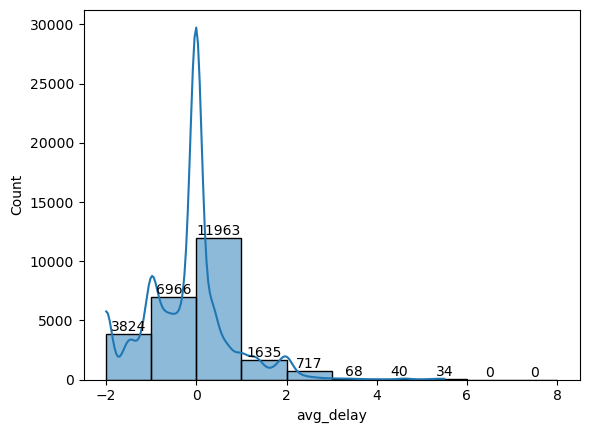

In [16]:
#Average delay plot
pay_cols = [f'pay_{i}' for i in [0] + list(range(2,7))]
print(df[pay_cols].describe())

bin_1 = [-2, -1, 0, 1, 2, 3, 4,5,6,7,8]
df['avg_delay'] = df[pay_cols].mean(axis=1)
delay_plot = sns.histplot(df['avg_delay'], bins = bin_1, kde=True)

for p in delay_plot.patches:
    height = p.get_height()
    delay_plot.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black')

### Repayment Status Plot

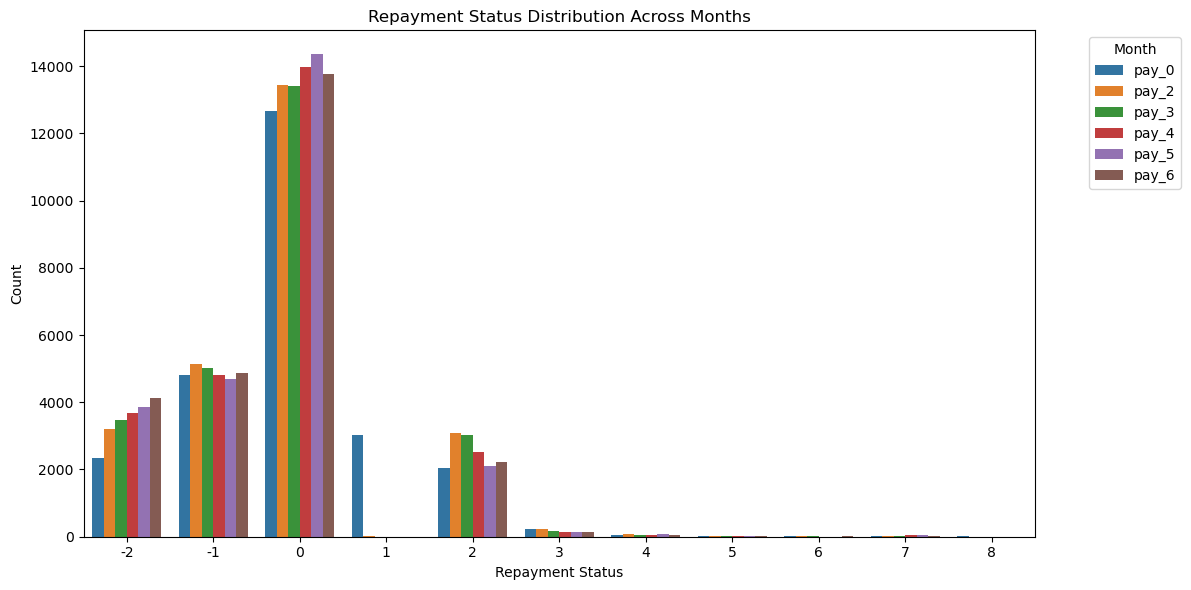

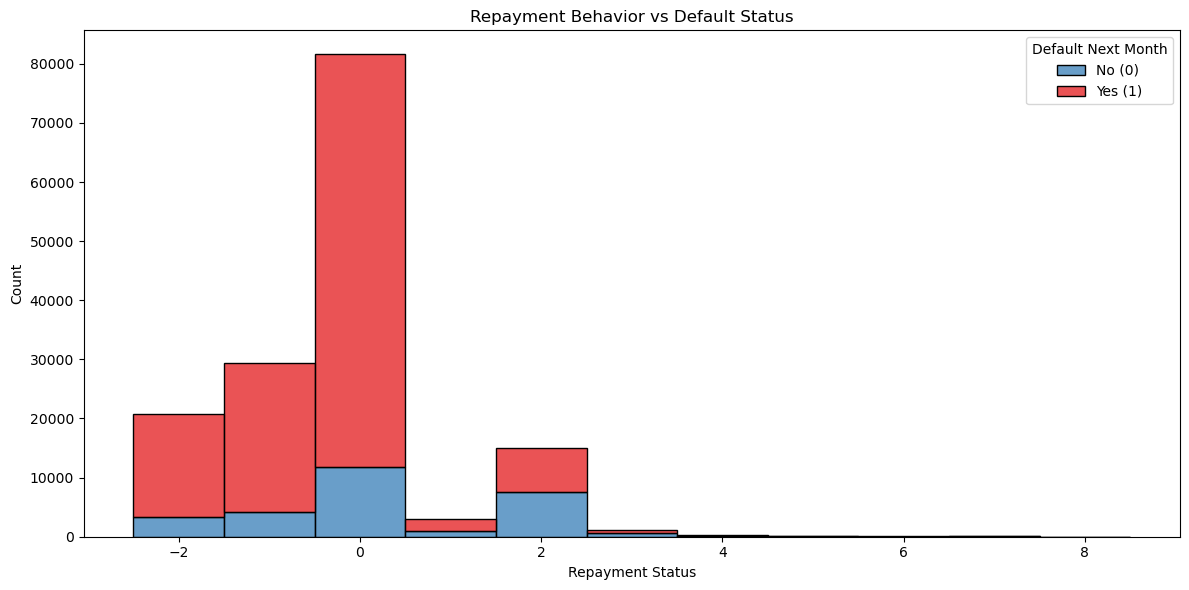

In [17]:
#Repayment status plot
df_melted = df.melt(id_vars='next_month_default', value_vars=pay_cols,
                    var_name='Month', value_name='Repayment_Status')

#Plot repayment status distribution per month
plt.figure(figsize=(12, 6))
sns.countplot(data=df_melted, x='Repayment_Status', hue='Month', palette='tab10')
plt.title('Repayment Status Distribution Across Months')
plt.xlabel('Repayment Status')
plt.ylabel('Count')
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#Plot repayment behavior by default status
plt.figure(figsize=(12, 6))
sns.histplot(data=df_melted, x='Repayment_Status', hue='next_month_default',
             multiple='stack', bins=20, palette='Set1', discrete=True)
plt.title('Repayment Behavior vs Default Status')
plt.xlabel('Repayment Status')
plt.ylabel('Count')
plt.legend(title='Default Next Month', labels=['No (0)', 'Yes (1)'])
plt.tight_layout()
plt.show()

## Correlation Matrix / Heatmap

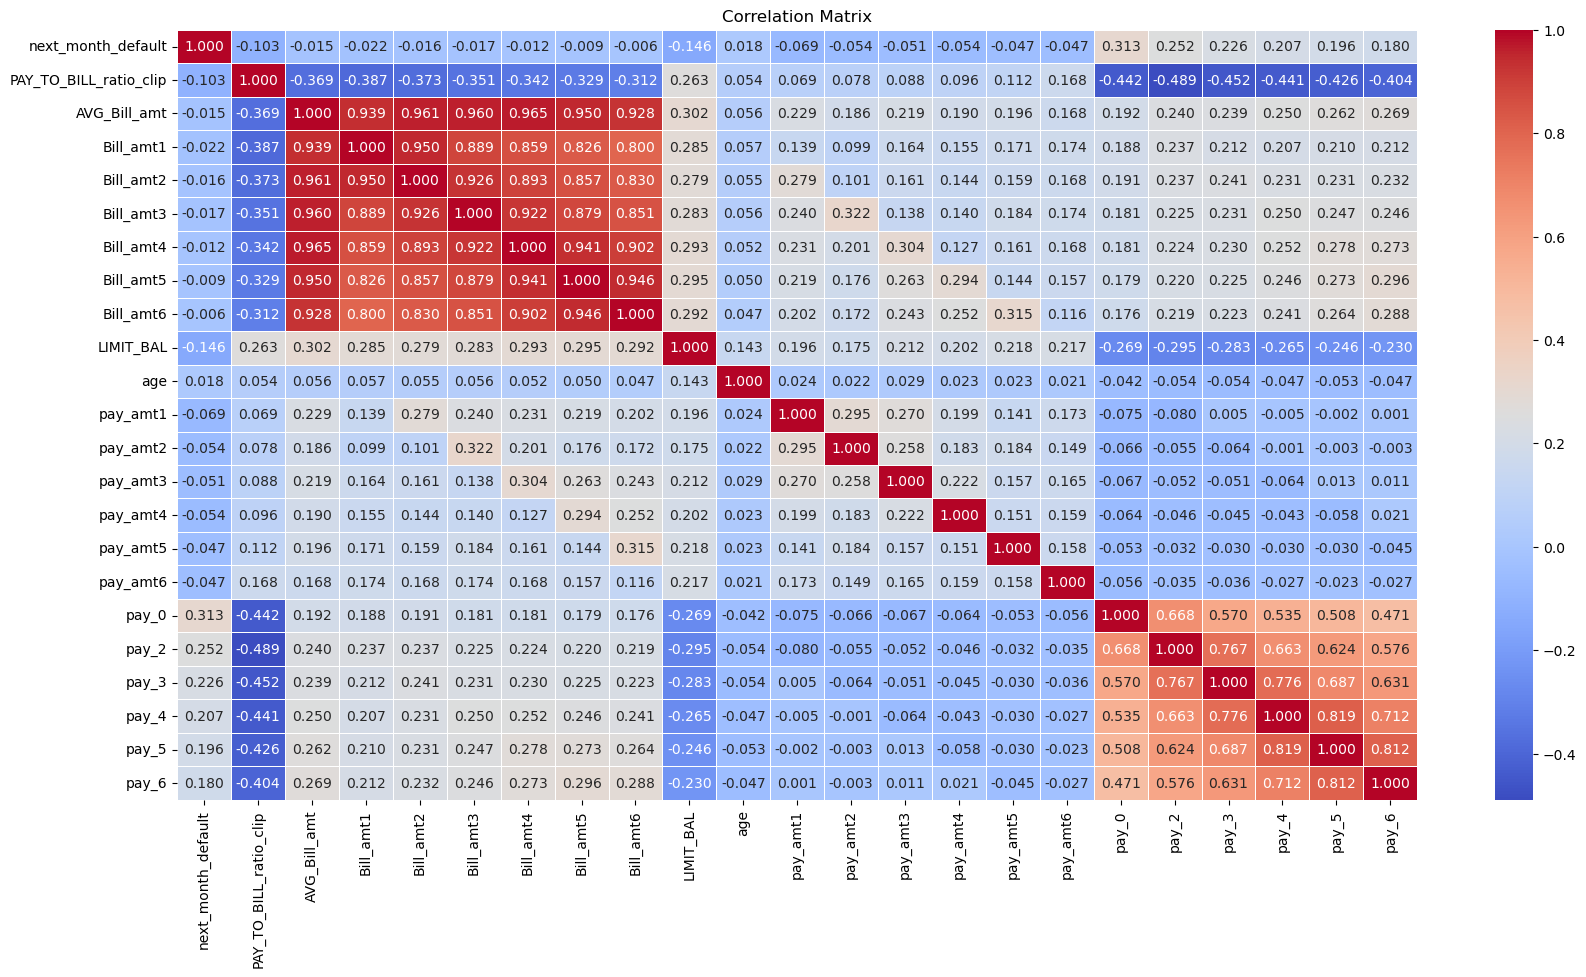

In [25]:
#Correlation matrix
include_1 = ['next_month_default', 'PAY_TO_BILL_ratio_clip'] + list(include) + list(pay_cols) 
corr_matrix = df[include_1].corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix, annot=True, fmt=".3f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [26]:
df.drop('PAY_TO_BILL_ratio', axis=1, inplace=True)

# 2. FEATURE ENGINEERING
#### Added the following features
1. Credit Utilization Ratio (average bill amount / credit limit)
2. Average Payment Amount over 6 months
3. Payment to Limit Ratio (total payments over limit)
4. Average Delay (mean of pay_0 to pay_6 where delay >= 0)
5. Max Delay (worst delinquency)
6. Count of Delayed Months (pay_x >= 1)
7. Consistency of Repayment (std deviation of pay_amt1 to pay_amt6)
8. Total Bill Amount (sum of 6 months)
9. Ratio: Payments vs Bills (Total payments / Total bills)
10. Repayment Ratio (average payments / average bills)
11. Max Utilization Rate (max bill / limit)
12. Balance Growth Rate (bill_amt1 - bill_amt6) / bill_amt6

In [27]:
pay_amt_cols = ['pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6']
bill_cols = ['Bill_amt1', 'Bill_amt2', 'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6']
pay_status_cols = ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']

df['credit_utilization_ratio'] = df['AVG_Bill_amt'] / df['LIMIT_BAL']

df['avg_pay_amt'] = df[pay_amt_cols].mean(axis=1)

df['payment_to_limit_ratio'] = df[pay_amt_cols].sum(axis=1) / df['LIMIT_BAL']

df['avg_payment_delay'] = df[pay_status_cols].apply(lambda row: row[row >= 0].mean(), axis=1).fillna(0)
 
df['max_payment_delay'] = df[pay_status_cols].max(axis=1)

df['delayed_months'] = df[pay_status_cols].apply(lambda row: (row >= 1).sum(), axis=1)

df['repayment_consistency'] = df[pay_amt_cols].std(axis=1)
 
df['total_bill_amt'] = df[bill_cols].sum(axis=1)

df['total_payment_to_bill_ratio'] = df[pay_amt_cols].sum(axis=1) / df[bill_cols].sum(axis=1).replace(0, np.nan)
 
df['repayment_ratio'] = df[pay_amt_cols].mean(axis=1) / df[bill_cols].replace(0, np.nan).mean(axis=1)

df['max_utilization'] = df[bill_cols].max(axis=1) / df['LIMIT_BAL']

df['balance_growth_rate'] = (df['Bill_amt1'] - df['Bill_amt6']) / df['Bill_amt6'].replace(0, np.nan)

#As we have used divide operator so it might have generated NaN or infinite values so to fix that 
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].replace([np.inf, -np.inf], np.nan).fillna(0)

new_features = ['credit_utilization_ratio', 'avg_pay_amt', 'payment_to_limit_ratio',
                'avg_payment_delay', 'max_payment_delay', 'delayed_months',
                'repayment_consistency', 'total_bill_amt',
                'total_payment_to_bill_ratio', 'repayment_ratio',
                'max_utilization', 'balance_growth_rate']

print(df[new_features].head())

   credit_utilization_ratio  avg_pay_amt  payment_to_limit_ratio  \
0                  0.691858  1326.185000                0.132619   
1                  0.008740   674.998333                0.013965   
2                  0.280122  2009.286667                0.066976   
3                  0.410617  3074.916667                0.087855   
4                  0.042194  8552.366667                0.183265   

   avg_payment_delay  max_payment_delay  delayed_months  \
0                1.0                  2               3   
1                0.0                  0               0   
2                0.0                  0               0   
3                0.0                  0               0   
4                0.0                 -2               0   

   repayment_consistency  total_bill_amt  total_payment_to_bill_ratio  \
0             714.956931       249068.99                     0.031947   
1            1129.473118        15210.46                     0.266263   
2             123

In [28]:
df[new_features].describe()

,credit_utilization_ratio,avg_pay_amt,payment_to_limit_ratio,avg_payment_delay,max_payment_delay,delayed_months,repayment_consistency,total_bill_amt,total_payment_to_bill_ratio,repayment_ratio,max_utilization,balance_growth_rate
count,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,2.524700e+04,25247.000000,25247.000000,25247.000000,2.524700e+04
mean,0.370435,5349.685697,0.235143,0.351996,0.401671,0.785915,5900.030185,2.693817e+05,57.126108,18.205099,0.492665,6.151485e+03
std,0.349451,10414.492020,0.321131,0.664764,1.321125,1.507302,15384.027068,3.768456e+05,5504.956211,1102.070157,0.432011,1.097118e+05
min,-0.200154,0.000000,0.000000,0.000000,-2.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-1.000000e+00
25%,0.029802,1125.200833,0.068289,0.000000,0.000000,0.000000,621.938712,2.938455e+04,0.042973,0.042544,0.070915,-1.512482e-01
50%,0.280751,2433.158333,0.156748,0.000000,0.000000,0.000000,1429.637898,1.266769e+05,0.104060,0.097190,0.426282,2.696391e-03
75%,0.682001,5641.549167,0.264483,0.500000,2.000000,1.000000,4176.290078,3.428564e+05,0.627927,0.516041,0.920626,9.258983e-01
max,3.759125,627344.321667,14.566342,6.000000,8.000000,6.000000,650098.453710,5.263884e+06,852634.315789,142105.719298,10.688579,1.069743e+07


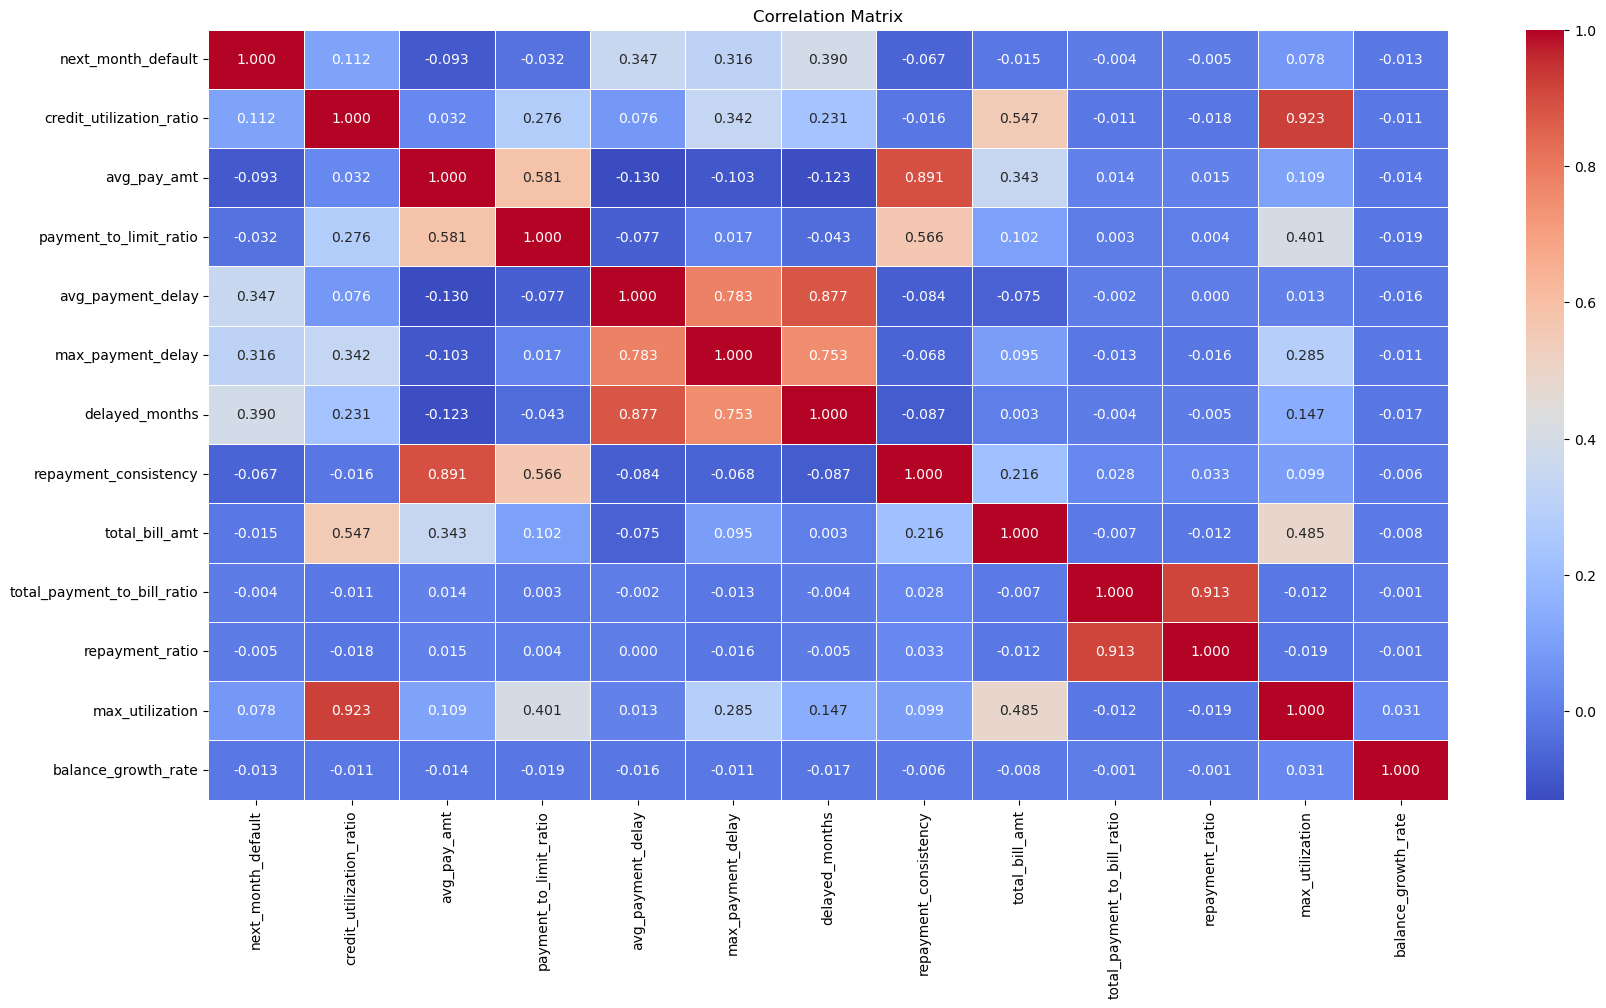

In [29]:
corr_2 = ['next_month_default'] +list(new_features)
corr_matrix_nf = df[corr_2].corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix_nf, annot=True, fmt=".3f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [30]:
corr_3 = df[corr_2].corr()
target_corr = corr_3['next_month_default'].sort_values(ascending=False)
print(target_corr)

next_month_default             1.000000
delayed_months                 0.389616
avg_payment_delay              0.347309
max_payment_delay              0.315777
credit_utilization_ratio       0.111658
max_utilization                0.077694
total_payment_to_bill_ratio   -0.003602
repayment_ratio               -0.004950
balance_growth_rate           -0.013490
total_bill_amt                -0.014674
payment_to_limit_ratio        -0.031848
repayment_consistency         -0.067327
avg_pay_amt                   -0.092854
Name: next_month_default, dtype: float64


In [31]:
df.describe()

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,Bill_amt1,Bill_amt2,Bill_amt3,Bill_amt4,Bill_amt5,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,next_month_default,PAY_TO_BILL_ratio_clip,credit_utilization_ratio,avg_pay_amt,payment_to_limit_ratio,avg_payment_delay,max_payment_delay,delayed_months,repayment_consistency,total_bill_amt,total_payment_to_bill_ratio,repayment_ratio,max_utilization,balance_growth_rate
count,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,2.524700e+04,25247.000000,25247.000000,25247.000000,25247.000000,2.524700e+04,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,2.524700e+04,25247.000000,25247.000000,25247.000000,2.524700e+04
mean,17640.000000,1.551907,0.604111,1.852101,168342.060443,35.261338,-0.042857,-0.159544,-0.190359,-0.241415,-0.282568,-0.307680,51170.887938,49092.268745,4.695839e+04,43134.911103,40218.976171,38806.221029,5718.624966,6.047352e+03,5288.910651,4865.960834,4906.766828,5270.499287,44859.647485,0.190399,0.331267,0.370435,5349.685697,0.235143,0.351996,0.401671,0.785915,5900.030185,2.693817e+05,57.126108,18.205099,0.492665,6.151485e+03
std,7288.325459,0.522629,0.489050,0.797379,129892.784807,9.486678,1.099315,1.173990,1.172636,1.146753,1.114213,1.130864,73250.806650,70695.367650,6.895687e+04,63846.205694,60389.690737,59182.792531,16806.842125,2.400962e+04,17851.879609,15979.116544,15860.726852,17960.816915,62819.226119,0.392624,0.415886,0.349451,10414.492020,0.321131,0.664764,1.321125,1.507302,15384.027068,3.768456e+05,5504.956211,1102.070157,0.432011,1.097118e+05
min,5017.000000,0.000000,0.000000,0.000000,10000.000000,0.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-56043.170000,0.000000,-0.785000,-0.200154,0.000000,0.000000,0.000000,-2.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-1.000000e+00
25%,11328.500000,1.000000,0.000000,1.000000,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3601.340000,3017.155000,2.753275e+03,2319.615000,1770.625000,1241.710000,999.985000,9.219100e+02,399.990000,300.150000,262.365000,130.070000,4858.670000,0.000000,0.040000,0.029802,1125.200833,0.068289,0.000000,0.000000,0.000000,621.938712,2.938455e+04,0.042973,0.042544,0.070915,-1.512482e-01
50%,17640.000000,2.000000,1.000000,2.000000,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22436.740000,21245.880000,2.008554e+04,19027.840000,18069.760000,17102.580000,2145.020000,2.026830e+03,1844.300000,1500.100000,1513.790000,1500.040000,21102.830000,0.000000,0.090000,0.280751,2433.158333,0.156748,0.000000,0.000000,0.000000,1429.637898,1.266769e+05,0.104060,0.097190,0.426282,2.696391e-03
75%,23951.500000,2.000000,1.000000,2.000000,240000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67373.410000,64151.875000,6.022971e+04,54391.160000,50289.525000,49245.195000,5031.150000,5.000190e+03,4600.640000,4014.990000,4099.890000,4018.780000,57136.580000,0.000000,0.590000,0.682001,5641.549167,0.264483,0.500000,2.000000,1.000000,4176.290078,3.428564e+05,0.627927,0.516041,0.920626,9.258983e-01
max,30263.000000,3.000000,1.000000,6.000000,1000000.000000,79.000000,8.000000,8.000000,8.000000,7.000000,7.000000,8.000000,964511.160000,983931.050000,1.664089e+06,891585.580000,927172.770000,961663.620000,873551.980000,1.684259e+06,896040.150000,621000.080000,426529.180000,528666.150000,877313.830000,1.000000,1.415000,3.759125,627344.321667,14.566342,6.000000,8.000000,6.000000,650098.453710,5.263884e+06,852634.315789,142105.719298,10.688579,1.069743e+07


In [32]:
print(df.isna().sum())

Customer_ID                    0
marriage                       0
sex                            0
education                      0
LIMIT_BAL                      0
age                            0
pay_0                          0
pay_2                          0
pay_3                          0
pay_4                          0
pay_5                          0
pay_6                          0
Bill_amt1                      0
Bill_amt2                      0
Bill_amt3                      0
Bill_amt4                      0
Bill_amt5                      0
Bill_amt6                      0
pay_amt1                       0
pay_amt2                       0
pay_amt3                       0
pay_amt4                       0
pay_amt5                       0
pay_amt6                       0
AVG_Bill_amt                   0
next_month_default             0
PAY_TO_BILL_ratio_clip         0
credit_utilization_ratio       0
avg_pay_amt                    0
payment_to_limit_ratio         0
avg_paymen

In [33]:
y = df['next_month_default']
X = df.drop(columns=['next_month_default'])

#Categorical features
cat_cols = ['delayed_months', 'max_payment_delay', 'pay_0', 'pay_2', 'pay_3', 'pay_4',
            'pay_5', 'pay_6', 'education', 'sex', 'marriage']
cat_indices = [X.columns.get_loc(col) for col in cat_cols]

# Split data before applying SMOTE (if chosen)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Class Weights (for use in models like LogisticRegression)
classes = np.unique(y_train)
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weight_dict = dict(zip(classes, class_weights))
print("Class Weights:", class_weight_dict)

# SMOTE (apply only on training data if used)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print("After SMOTE, class distribution:")
print(y_train_smote.value_counts())

# Apply SMOTENC
smotenc = SMOTENC(categorical_features=cat_indices, random_state=42)
X_train_smotenc, y_train_smotenc = smotenc.fit_resample(X_train, y_train)
print("After SMOTENC, class distribution:")
print(y_train_smote.value_counts())


Class Weights: {0: 0.6175697162426614, 1: 2.6263979193758127}
After SMOTE, class distribution:
next_month_default
0    16352
1    16352
Name: count, dtype: int64
After SMOTENC, class distribution:
next_month_default
0    16352
1    16352
Name: count, dtype: int64


In [34]:
X_train_final, y_train_final = X_train_smotenc, y_train_smotenc

# Convert y to numeric if encoded as strings
y_train_final = y_train_final.astype(int)
y_val = y_val.astype(int)

# Scale features for Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_final)
X_val_scaled = scaler.transform(X_val)

# Calculate scale_pos_weight for XGBoost and LGBM
pos_count = np.sum(y_train_final == 1)
neg_count = np.sum(y_train_final == 0)
scale_pos_weight = neg_count / pos_count if pos_count != 0 else 1

In [35]:
# Model 1: Logistic Regression with class weights and scaled features
lr = LogisticRegression(class_weight='balanced', max_iter=2000)
lr.fit(X_train_scaled, y_train_final)
y_pred_lr = lr.predict(X_val_scaled)
y_proba_lr = lr.predict_proba(X_val_scaled)[:, 1]

In [36]:
# Model 2: Random Forest
rf = RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42)
rf.fit(X_train_final, y_train_final)
y_pred_rf = rf.predict(X_val)
y_proba_rf = rf.predict_proba(X_val)[:, 1]

In [37]:
# Model 3: XGBoost
xgb = XGBClassifier(scale_pos_weight=scale_pos_weight,
                    use_label_encoder=False, eval_metric='logloss', random_state=42)

# Ensure y_train_final is numpy array of integers
xgb.fit(X_train_final, y_train_final)
y_pred_xgb = xgb.predict(X_val)
y_proba_xgb = xgb.predict_proba(X_val)[:, 1]

C:\Users\heman\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:20:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [38]:
# Model 4: LightGBM
lgbm = LGBMClassifier(scale_pos_weight=scale_pos_weight, random_state=42)
lgbm.fit(X_train_final, y_train_final)
y_pred_lgbm = lgbm.predict(X_val)
y_proba_lgbm = lgbm.predict_proba(X_val)[:, 1]

[LightGBM] [Info] Number of positive: 16352, number of negative: 16352
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010402 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6972
[LightGBM] [Info] Number of data points in the train set: 32704, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000



Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.90      0.80      0.84      4088
           1       0.41      0.61      0.49       962

    accuracy                           0.76      5050
   macro avg       0.66      0.70      0.67      5050
weighted avg       0.80      0.76      0.78      5050

F2 Score: 0.5581
Confusion Matrix:
[[3256  832]
 [ 374  588]]
ROC AUC: 0.7562

Model: Random Forest
              precision    recall  f1-score   support

           0       0.88      0.91      0.89      4088
           1       0.53      0.46      0.49       962

    accuracy                           0.82      5050
   macro avg       0.71      0.68      0.69      5050
weighted avg       0.81      0.82      0.82      5050

F2 Score: 0.4744
Confusion Matrix:
[[3700  388]
 [ 518  444]]
ROC AUC: 0.7731

Model: XGBoost
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      4088
           1   

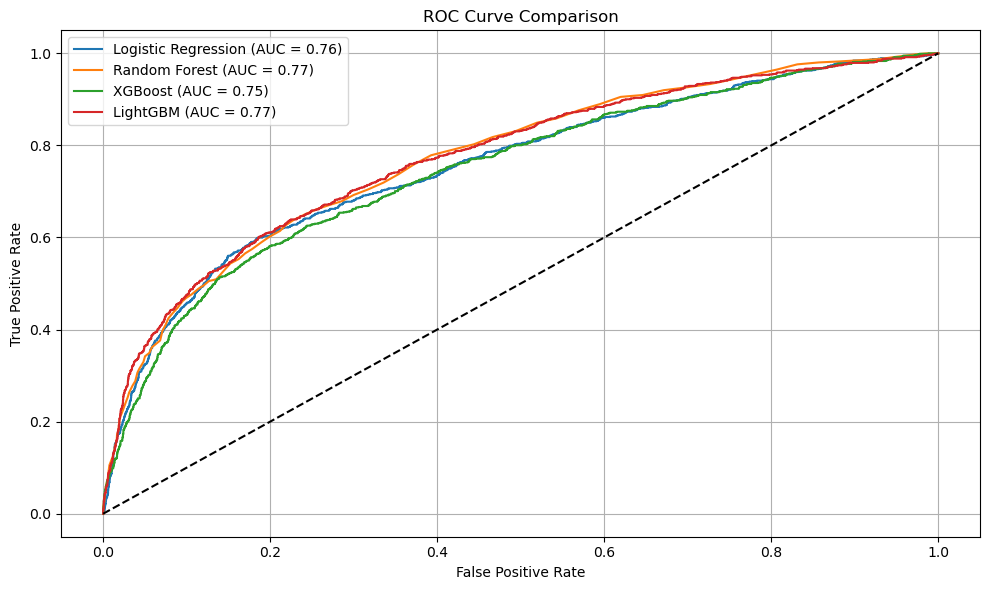

In [42]:
# Function to evaluate models
def evaluate_model(name, y_true, y_pred, y_proba):
    print(f"\nModel: {name}")
    print(classification_report(y_true, y_pred))
    print(f"F2 Score: {fbeta_score(y_true, y_pred, beta=2):.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    print(f"ROC AUC: {roc_auc_score(y_true, y_proba):.4f}")

    fpr, tpr, _ = roc_curve(y_true.astype(int), y_proba, pos_label=1)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score(y_true, y_proba):.2f})")

# Evaluate all models
plt.figure(figsize=(10, 6))
evaluate_model("Logistic Regression", y_val, y_pred_lr, y_proba_lr)
evaluate_model("Random Forest", y_val, y_pred_rf, y_proba_rf)
evaluate_model("XGBoost", y_val, y_pred_xgb, y_proba_xgb)
evaluate_model("LightGBM", y_val, y_pred_lgbm, y_proba_lgbm)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

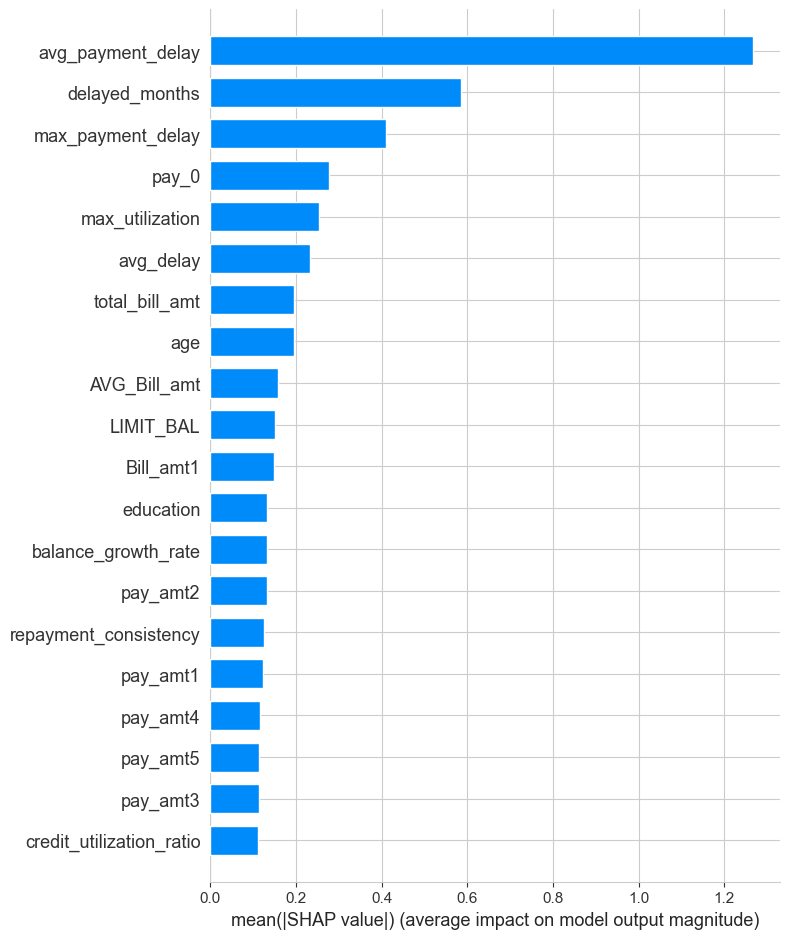

In [131]:
'''!pip install shap'''
import shap

explainer = shap.Explainer(xgb)
shap_values = explainer(X_val)

shap.summary_plot(shap_values, X_val, plot_type="bar")

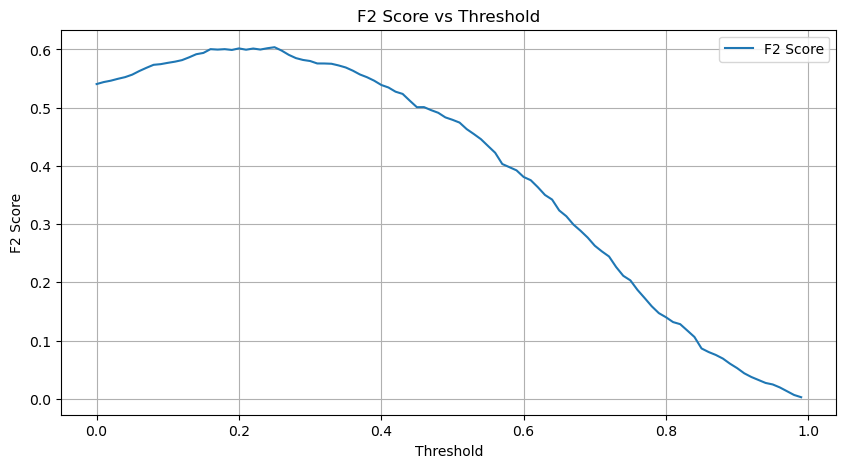

Best threshold for maximum F2: 0.250, F2 Score: 0.6038


In [43]:
from sklearn.metrics import fbeta_score, precision_recall_curve
import matplotlib.pyplot as plt
import numpy as np

# Get precision, recall, thresholds
precision, recall, thresholds = precision_recall_curve(y_val, y_proba_rf)

# Compute F2 score for each threshold
f2_scores = [(5 * p * r) / (4 * p + r + 1e-10) for p, r in zip(precision, recall)]

# Plot F2 score vs threshold
plt.figure(figsize=(10, 5))
plt.plot(thresholds, f2_scores[:-1], label='F2 Score')
plt.xlabel('Threshold')
plt.ylabel('F2 Score')
plt.title('F2 Score vs Threshold')
plt.grid(True)
plt.legend()
plt.show()

# Best threshold
best_thresh = thresholds[np.argmax(f2_scores)]
print(f"Best threshold for maximum F2: {best_thresh:.3f}, F2 Score: {max(f2_scores):.4f}")


In [44]:
print("Random Forest tuned to give maximum F2 score: \n")
print(f"  Best threshold for maximum F2: {best_thresh:.3f}, F2 Score: {max(f2_scores):.4f} \n")

print("   Classification report for random forest tuned")
y_pred_best = (y_proba_rf >= best_thresh).astype(int)
print(classification_report(y_val, y_pred_best))
print("Confusion Matrix")
print(confusion_matrix(y_val, y_pred_best))

Random Forest tuned to give maximum F2 score: 

  Best threshold for maximum F2: 0.250, F2 Score: 0.6038 

   Classification report for random forest tuned
              precision    recall  f1-score   support

           0       0.92      0.61      0.73      4088
           1       0.32      0.78      0.45       962

    accuracy                           0.64      5050
   macro avg       0.62      0.69      0.59      5050
weighted avg       0.81      0.64      0.68      5050

Confusion Matrix
[[2483 1605]
 [ 213  749]]


In [45]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, fbeta_score

# Define F2 scorer
f2_scorer = make_scorer(fbeta_score, beta=2)

# LightGBM with balanced class weights
lgbm = LGBMClassifier(class_weight='balanced', random_state=42)

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [15, 31, 63],
    'max_depth': [-1, 5, 10]
}

# Grid Search with F2 scoring
grid = GridSearchCV(estimator=lgbm,
                    param_grid=param_grid,
                    scoring=f2_scorer,
                    cv=3,
                    verbose=1,
                    n_jobs=1)

grid.fit(X_train_final, y_train_final)

# Best model
print("Best Params:", grid.best_params_)
print("Best F2 Score on CV:", grid.best_score_)

# Predict with best model
best_lgbm = grid.best_estimator_
y_pred_lgbm = best_lgbm.predict(X_val)
y_proba_lgbm = best_lgbm.predict_proba(X_val)[:, 1]

# Final Evaluation
from sklearn.metrics import classification_report
print("LGBM with Best Params:\n", classification_report(y_val, y_pred_lgbm))


Fitting 3 folds for each of 54 candidates, totalling 162 fits
[LightGBM] [Info] Number of positive: 10901, number of negative: 10901
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007079 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6969
[LightGBM] [Info] Number of data points in the train set: 21802, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 10902, number of negative: 10901
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007672 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6968
[LightGBM] [Info] Number of data points in the train set: 21803, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[Ligh

In [46]:
print("LGBM hyperparameters tuned to give better classification reports \n")
print("Best Params:", grid.best_params_)
print(" \n Best F2 Score on CV:", grid.best_score_)

print(" \n LGBM tuned with Best HyperParams:\n", classification_report(y_val, y_pred_lgbm))
print("Confusion Matrix")
print(confusion_matrix(y_val, y_pred_lgbm))
print(f"ROC AUC: {roc_auc_score(y_val, y_proba_lgbm):.4f}")

LGBM hyperparameters tuned to give better classification reports 

Best Params: {'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 100, 'num_leaves': 63}
 
 Best F2 Score on CV: 0.7859366561280646
 
 LGBM tuned with Best HyperParams:
               precision    recall  f1-score   support

           0       0.87      0.90      0.89      4088
           1       0.51      0.45      0.48       962

    accuracy                           0.81      5050
   macro avg       0.69      0.68      0.68      5050
weighted avg       0.81      0.81      0.81      5050

Confusion Matrix
[[3671  417]
 [ 525  437]]
ROC AUC: 0.7685


### For Smote

In [47]:
X_train_final, y_train_final = X_train_smote, y_train_smote

# Convert y to numeric if encoded as strings
y_train_final = y_train_final.astype(int)
y_val = y_val.astype(int)

# Scale features for Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_final)
X_val_scaled = scaler.transform(X_val)

# Calculate scale_pos_weight for XGBoost and LGBM
pos_count = np.sum(y_train_final == 1)
neg_count = np.sum(y_train_final == 0)
scale_pos_weight = neg_count / pos_count if pos_count != 0 else 1

In [48]:
# Model 1: Logistic Regression with class weights and scaled features
lr = LogisticRegression(class_weight='balanced', max_iter=2000)
lr.fit(X_train_scaled, y_train_final)
y_pred_lr = lr.predict(X_val_scaled)
y_proba_lr = lr.predict_proba(X_val_scaled)[:, 1]

In [49]:
# Model 2: Random Forest
rf = RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42)
rf.fit(X_train_final, y_train_final)
y_pred_rf = rf.predict(X_val)
y_proba_rf = rf.predict_proba(X_val)[:, 1]

In [50]:
# Model 3: XGBoost
xgb = XGBClassifier(scale_pos_weight=scale_pos_weight,
                    use_label_encoder=False, eval_metric='logloss', random_state=42)

# Ensure y_train_final is numpy array of integers
xgb.fit(X_train_final, y_train_final)
y_pred_xgb = xgb.predict(X_val)
y_proba_xgb = xgb.predict_proba(X_val)[:, 1]

C:\Users\heman\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:40:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [51]:
# Model 4: LightGBM
lgbm = LGBMClassifier(scale_pos_weight=scale_pos_weight, random_state=42)
lgbm.fit(X_train_final, y_train_final)
y_pred_lgbm = lgbm.predict(X_val)
y_proba_lgbm = lgbm.predict_proba(X_val)[:, 1]

[LightGBM] [Info] Number of positive: 16352, number of negative: 16352
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010791 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6976
[LightGBM] [Info] Number of data points in the train set: 32704, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000



Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.88      0.78      0.83      4088
           1       0.37      0.55      0.45       962

    accuracy                           0.74      5050
   macro avg       0.63      0.67      0.64      5050
weighted avg       0.78      0.74      0.76      5050

F2 Score: 0.5037
Confusion Matrix:
[[3196  892]
 [ 431  531]]
ROC AUC: 0.7180

Model: Random Forest
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      4088
           1       0.54      0.41      0.47       962

    accuracy                           0.82      5050
   macro avg       0.71      0.67      0.68      5050
weighted avg       0.81      0.82      0.81      5050

F2 Score: 0.4336
Confusion Matrix:
[[3755  333]
 [ 565  397]]
ROC AUC: 0.7701

Model: XGBoost
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      4088
           1   

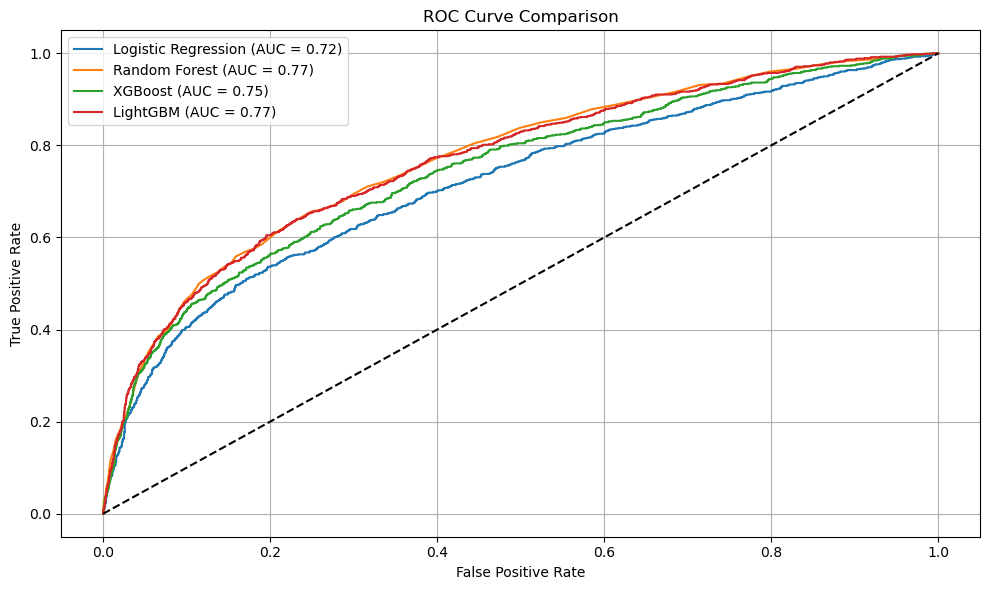

In [52]:
# Function to evaluate models
def evaluate_model(name, y_true, y_pred, y_proba):
    print(f"\nModel: {name}")
    print(classification_report(y_true, y_pred))
    print(f"F2 Score: {fbeta_score(y_true, y_pred, beta=2):.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    print(f"ROC AUC: {roc_auc_score(y_true, y_proba):.4f}")

    fpr, tpr, _ = roc_curve(y_true.astype(int), y_proba, pos_label=1)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score(y_true, y_proba):.2f})")

# Evaluate all models
plt.figure(figsize=(10, 6))
evaluate_model("Logistic Regression", y_val, y_pred_lr, y_proba_lr)
evaluate_model("Random Forest", y_val, y_pred_rf, y_proba_rf)
evaluate_model("XGBoost", y_val, y_pred_xgb, y_proba_xgb)
evaluate_model("LightGBM", y_val, y_pred_lgbm, y_proba_lgbm)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

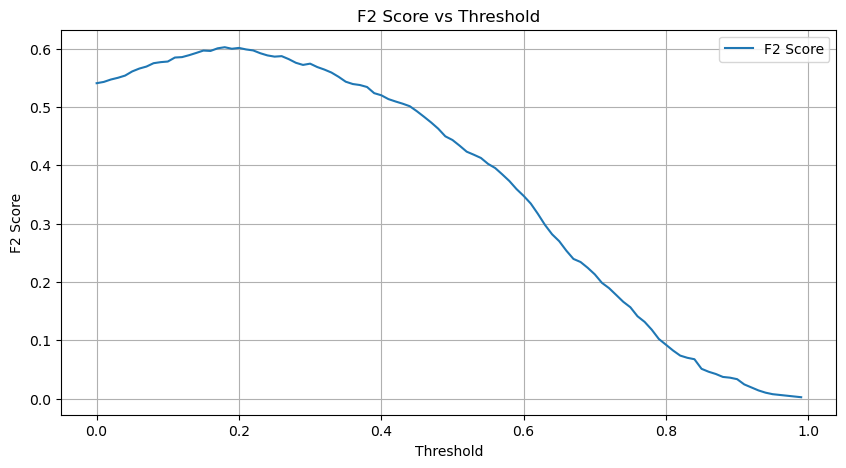

Best threshold for maximum F2: 0.180, F2 Score: 0.6022


In [53]:
from sklearn.metrics import fbeta_score, precision_recall_curve
import matplotlib.pyplot as plt
import numpy as np

# Get precision, recall, thresholds
precision, recall, thresholds = precision_recall_curve(y_val, y_proba_rf)

# Compute F2 score for each threshold
f2_scores = [(5 * p * r) / (4 * p + r + 1e-10) for p, r in zip(precision, recall)]

# Plot F2 score vs threshold
plt.figure(figsize=(10, 5))
plt.plot(thresholds, f2_scores[:-1], label='F2 Score')
plt.xlabel('Threshold')
plt.ylabel('F2 Score')
plt.title('F2 Score vs Threshold')
plt.grid(True)
plt.legend()
plt.show()

# Best threshold
best_thresh = thresholds[np.argmax(f2_scores)]
print(f"Best threshold for maximum F2: {best_thresh:.3f}, F2 Score: {max(f2_scores):.4f}")


In [54]:
print("Random Forest tuned to give maximum F2 score: \n")
print(f"  Best threshold for maximum F2: {best_thresh:.3f}, F2 Score: {max(f2_scores):.4f} \n")

print("   Classification report for random forest tuned")
y_pred_best = (y_proba_rf >= best_thresh).astype(int)
print(classification_report(y_val, y_pred_best))
print("Confusion Matrix")
print(confusion_matrix(y_val, y_pred_best))

Random Forest tuned to give maximum F2 score: 

  Best threshold for maximum F2: 0.180, F2 Score: 0.6022 

   Classification report for random forest tuned
              precision    recall  f1-score   support

           0       0.93      0.50      0.65      4088
           1       0.28      0.84      0.42       962

    accuracy                           0.57      5050
   macro avg       0.61      0.67      0.54      5050
weighted avg       0.81      0.57      0.61      5050

Confusion Matrix
[[2050 2038]
 [ 156  806]]


In [55]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, fbeta_score

# Define F2 scorer
f2_scorer = make_scorer(fbeta_score, beta=2)

# LightGBM with balanced class weights
lgbm = LGBMClassifier(class_weight='balanced', random_state=42)

# parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [15, 31, 63],
    'max_depth': [-1, 5, 10]
}

# Grid Search with F2 scoring
grid = GridSearchCV(estimator=lgbm,
                    param_grid=param_grid,
                    scoring=f2_scorer,
                    cv=3,
                    verbose=1,
                    n_jobs=1)

grid.fit(X_train_final, y_train_final)

# Best model
print("Best Params:", grid.best_params_)
print("Best F2 Score on CV:", grid.best_score_)

# Predict with best model
best_lgbm = grid.best_estimator_
y_pred_lgbm = best_lgbm.predict(X_val)
y_proba_lgbm = best_lgbm.predict_proba(X_val)[:, 1]

# Final Evaluation
from sklearn.metrics import classification_report
print("LGBM with Best Params:\n", classification_report(y_val, y_pred_lgbm))


Fitting 3 folds for each of 54 candidates, totalling 162 fits
[LightGBM] [Info] Number of positive: 10901, number of negative: 10901
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007142 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6977
[LightGBM] [Info] Number of data points in the train set: 21802, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 10902, number of negative: 10901
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007762 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6970
[LightGBM] [Info] Number of data points in the train set: 21803, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[Ligh

In [56]:
print("LGBM hyperparameters tuned to give better classification reports \n")
print("Best Params:", grid.best_params_)
print(" \n Best F2 Score on CV:", grid.best_score_)

print(" \n LGBM tuned with Best HyperParams:\n", classification_report(y_val, y_pred_lgbm))
print("Confusion Matrix")
print(confusion_matrix(y_val, y_pred_lgbm))
print(f"ROC AUC: {roc_auc_score(y_val, y_proba_lgbm):.4f}")

LGBM hyperparameters tuned to give better classification reports 

Best Params: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100, 'num_leaves': 31}
 
 Best F2 Score on CV: 0.7684948315201486
 
 LGBM tuned with Best HyperParams:
               precision    recall  f1-score   support

           0       0.89      0.86      0.87      4088
           1       0.48      0.55      0.51       962

    accuracy                           0.80      5050
   macro avg       0.68      0.70      0.69      5050
weighted avg       0.81      0.80      0.80      5050

Confusion Matrix
[[3506  582]
 [ 435  527]]
ROC AUC: 0.7737
